# Load Data from kaggle to google drive

In [2]:
from google.colab import files, drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [3]:
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 1.80GB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


# Code of Model

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]
data['target'] = data['target'].replace(4, 1)  # 1 = positive, 0 = negative

In [7]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(f"[{string.punctuation}]", '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['clean_text'] = data['text'].apply(clean_text)
data = data.sample(50000, random_state=42)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['clean_text'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
n_values = [10, 25, 50, 75, 100, 150, 200, 250, 300]
results = []

for n in n_values:
    print(f"\nدر حال آموزش مدل با {n} درخت...")

    # ساخت مدل جنگل تصادفی
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # پیش‌بینی روی داده تست
    y_pred = rf.predict(X_test)

    # محاسبه‌ی معیارها
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results.append({
        'n_estimators': n,
        'accuracy': acc,
        'precision': prec,
        'recall': rec
    })

    print(f"✅ n = {n} → Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")


در حال آموزش مدل با 10 درخت...
✅ n = 10 → Accuracy: 0.7136 | Precision: 0.7245 | Recall: 0.6936

در حال آموزش مدل با 25 درخت...
✅ n = 25 → Accuracy: 0.7221 | Precision: 0.7197 | Recall: 0.7318

در حال آموزش مدل با 50 درخت...
✅ n = 50 → Accuracy: 0.7266 | Precision: 0.7261 | Recall: 0.7316

در حال آموزش مدل با 75 درخت...
✅ n = 75 → Accuracy: 0.7267 | Precision: 0.7235 | Recall: 0.7378

در حال آموزش مدل با 100 درخت...
✅ n = 100 → Accuracy: 0.7263 | Precision: 0.7240 | Recall: 0.7354

در حال آموزش مدل با 150 درخت...
✅ n = 150 → Accuracy: 0.7279 | Precision: 0.7252 | Recall: 0.7380

در حال آموزش مدل با 200 درخت...
✅ n = 200 → Accuracy: 0.7277 | Precision: 0.7247 | Recall: 0.7384

در حال آموزش مدل با 250 درخت...
✅ n = 250 → Accuracy: 0.7285 | Precision: 0.7258 | Recall: 0.7384

در حال آموزش مدل با 300 درخت...
✅ n = 300 → Accuracy: 0.7275 | Precision: 0.7243 | Recall: 0.7386


In [10]:
results_df = pd.DataFrame(results)
print("\nخلاصه نتایج:")
print(results_df)


خلاصه نتایج:
   n_estimators  accuracy  precision    recall
0            10    0.7136   0.724475  0.693609
1            25    0.7221   0.719655  0.731834
2            50    0.7266   0.726141  0.731634
3            75    0.7267   0.723545  0.737806
4           100    0.7263   0.724030  0.735417
5           150    0.7279   0.725156  0.738005
6           200    0.7277   0.724697  0.738403
7           250    0.7285   0.725832  0.738403
8           300    0.7275   0.724326  0.738602


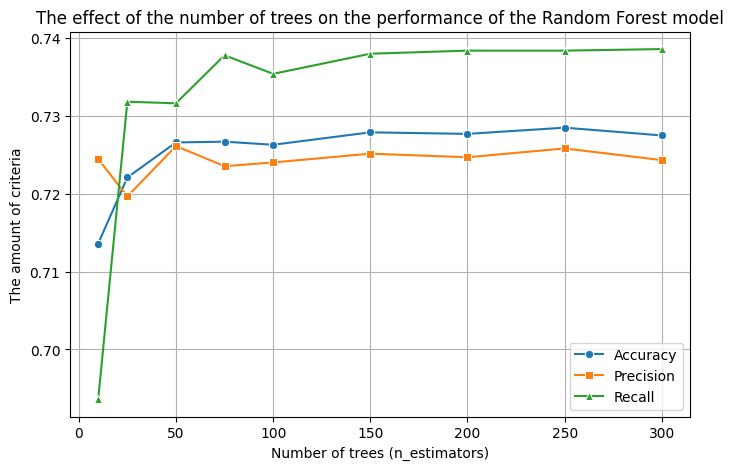

In [11]:
plt.figure(figsize=(8,5))
sns.lineplot(x='n_estimators', y='accuracy', data=results_df, marker='o', label='Accuracy')
sns.lineplot(x='n_estimators', y='precision', data=results_df, marker='s', label='Precision')
sns.lineplot(x='n_estimators', y='recall', data=results_df, marker='^', label='Recall')
plt.title('The effect of the number of trees on the performance of the Random Forest model')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('The amount of criteria')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
best_n = results_df.loc[results_df['accuracy'].idxmax(), 'n_estimators']
print(f"\n📊 بهترین مدل با n_estimators = {best_n}")


📊 بهترین مدل با n_estimators = 250


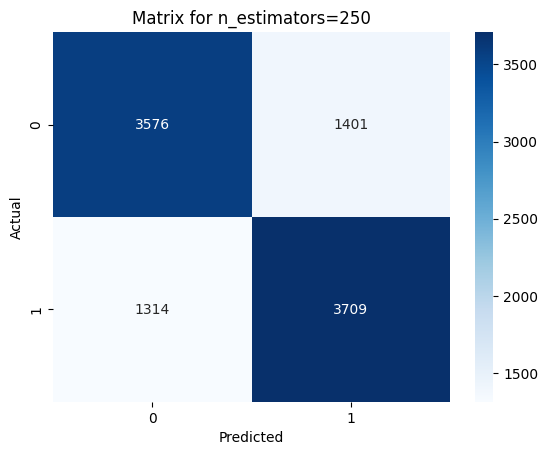

In [13]:
best_model = RandomForestClassifier(n_estimators=int(best_n), random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrix for n_estimators={best_n}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()